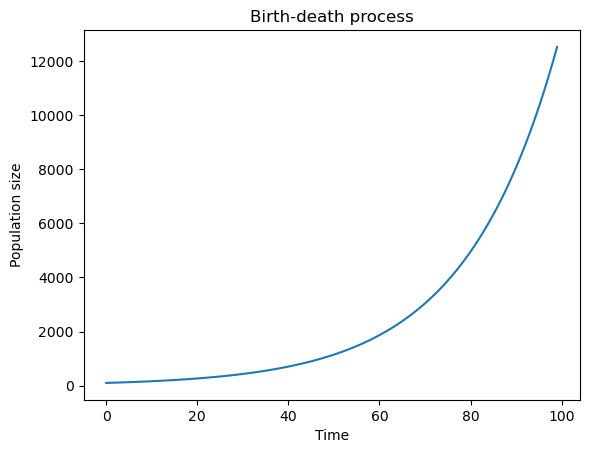

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def birth_death_process(birth_rate, death_rate, initial_population, time_steps):
    population = np.zeros(time_steps)
    population[0] = initial_population
    for t in range(1, time_steps):
        birth = birth_rate * population[t-1]
        death = death_rate * population[t-1]
        population[t] = population[t-1] + birth - death
    return population

birth_rate = 0.1
death_rate = 0.05
initial_population = 100
time_steps = 100
population = birth_death_process(birth_rate, death_rate, initial_population, time_steps)
plt.plot(population)
plt.xlabel('Time')
plt.ylabel('Population size')
plt.title('Birth-death process')
plt.show()

In [4]:
def stationary_distribution(birth_rate, death_rate):
    return death_rate / (birth_rate + death_rate)

birth_rate = 0.1
death_rate = 0.05
print(stationary_distribution(birth_rate, death_rate))

0.3333333333333333


In [6]:
def expected_time_absorption(birth_rate, death_rate, states):
    expected_times = []
    for state in states:
        if birth_rate == death_rate:
            expected_time = state
        else:
            expected_time = 1 / (birth_rate + death_rate) * state
        expected_times.append(f'{state}: {expected_time:.2f}')
    return expected_times
        
birth_rate = 0.1
death_rate = 0.05
states = range(1, 10)
print(expected_time_absorption(birth_rate, death_rate, states))

['1: 6.67', '2: 13.33', '3: 20.00', '4: 26.67', '5: 33.33', '6: 40.00', '7: 46.67', '8: 53.33', '9: 60.00']


In [5]:
import numpy as np
import matplotlib as plt

def birth_death_queue(arrival_rate, service_rate, initial_customers, time_steps):
    customers = np.zeros(time_steps)
    customers[0] = initial_customers
    for t in range(1, time_steps):
        arrival = arrival_rate
        service = service_rate * customers[t-1]
        customers[t] = customers[t-1] + arrival - service
    return customers

arrival_rate = 0.1
service_rate = 0.05
initial_customers = 100
time_steps = 100
customers = birth_death_queue(arrival_rate, service_rate, initial_customers, time_steps)
plt.plot(customers)
plt.xlabel('Time')
plt.ylabel('Number of customers')
plt.title('Birth-death queueing system')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'plot'

In [7]:
def birth_death_probability(t, initial_state, target_state, birth_rate, death_rate):
	
	max_state = max(initial_state, target_state) + int(t * max(birth_rate, death_rate))
	probabilities = np.zeros((max_state + 1, t + 1))

	probabilities[initial_state, 0] = 1.0

	for time_step in range(1, t + 1):
		for state in range(max_state + 1):

			if state == 0:
				probabilities[state, time_step] = probabilities[state, time_step - 1] * (1 - birth_rate)
			elif state == max_state:
				probabilities[state, time_step] = probabilities[state, time_step - 1] * (1 - death_rate) + probabilities[state - 1, time_step - 1] * birth_rate
			else:
				probabilities[state, time_step] = (
            		probabilities[state, time_step - 1] * (1 - birth_rate - death_rate)
            		+ probabilities[state - 1, time_step - 1] * birth_rate
            		+ probabilities[state + 1, time_step - 1] * death_rate
        		)

	return probabilities[target_state, t]

t = 10
initial_state = 5
target_state = 7
birth_rate = 0.1
death_rate = 0.05

probability = birth_death_probability(t, initial_state, target_state, birth_rate, death_rate)
print(f"The probability of reaching state {target_state} after {t} time units is {probability:.04f}")

The probability of reaching state 7 after 10 time units is 0.1395
